In [1]:
from keras.datasets import reuters
import numpy as np

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [3]:
max([len(seq) for seq in train_data])

2376

In [4]:
arr = [len(seq) for seq in train_data]

In [5]:
np.argmax(arr)

8699

In [6]:
word_index = reuters.get_word_index()

In [7]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [8]:
decoded_newswire=' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
train_labels[0]

3

In [10]:
def vectorize_sequences(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results 

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
train_data[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [13]:
x_train[0][:10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [14]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [15]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [16]:
from keras.utils import to_categorical

In [17]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [18]:
from keras import models,layers

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [20]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(x = partial_x_train, y = partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val) )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 138us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 117us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 118us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0789 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.7033 - acc: 0.8472 - val_loss: 0.9845 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.5665 - acc: 0.8797 - val_loss: 0.9417 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9079 - val_acc: 0.8020


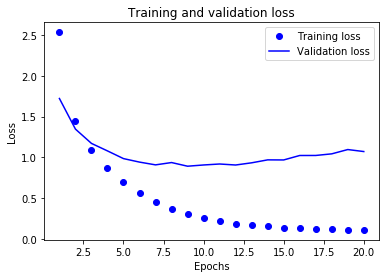

In [24]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

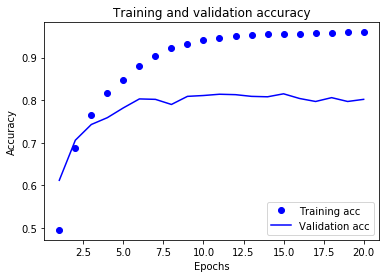

In [25]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
from keras import losses,optimizers

In [27]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer=optimizers.rmsprop(lr=0.001),loss=losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=256,validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 148us/step - loss: 2.0711 - acc: 0.5651 - val_loss: 1.4722 - val_acc: 0.6390
Epoch 2/20
7982/7982 [==============================] - 1s 132us/step - loss: 1.1556 - acc: 0.7390 - val_loss: 1.1445 - val_acc: 0.7390
Epoch 3/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.8264 - acc: 0.8172 - val_loss: 1.0571 - val_acc: 0.7690
Epoch 4/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.5952 - acc: 0.8677 - val_loss: 0.9838 - val_acc: 0.7880
Epoch 5/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.4410 - acc: 0.9004 - val_loss: 1.0061 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 168us/step - loss: 0.3358 - acc: 0.9298 - val_loss: 1.0248 - val_acc: 0.7930
Epoch 7/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.2619 - acc: 0.9406 - val_loss: 0.9863 - val_acc: 0.8090


In [28]:
results

[1.5082063432898993, 0.759572573490474]

In [29]:
import copy

In [30]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels)==np.array(test_labels_copy)

In [31]:
np.sum(hits_array)/len(test_labels)

0.1829919857524488

In [32]:
predictions = model.predict(x_test)
predictions

array([[1.7603053e-05, 7.8148096e-06, 1.3337628e-09, ..., 2.9412711e-10,
        1.5360314e-15, 1.3818999e-10],
       [9.5629208e-03, 2.6110988e-02, 9.8148266e-06, ..., 3.7612504e-06,
        2.3958006e-05, 2.4619736e-02],
       [2.3609953e-02, 6.3849974e-01, 6.9596739e-05, ..., 5.0261564e-04,
        4.8009770e-05, 2.3773136e-03],
       ...,
       [2.3469777e-07, 2.6007083e-05, 1.0508993e-07, ..., 6.1123433e-11,
        1.5562917e-12, 9.6915961e-11],
       [2.9542230e-03, 2.7513692e-01, 3.4581590e-04, ..., 2.2636752e-06,
        7.2813867e-07, 3.2976841e-05],
       [2.1306871e-06, 8.8359565e-01, 2.0155372e-05, ..., 8.9922185e-09,
        2.8886810e-10, 1.3380624e-05]], dtype=float32)

In [33]:
np.argmax(predictions[41]) == np.argmax(one_hot_test_labels[41])

True

In [36]:
f = reuters.

TypeError: get_file() missing 2 required positional arguments: 'fname' and 'origin'